In [112]:
import os
import numpy as np
import pandas as pd
import time
import visual_behavior.database as db
import datetime
pd.set_option('display.max_columns', 500)
import visual_behavior.data_access.loading as loading
import visual_behavior_glm.GLM_analysis_tools as gat
from visual_behavior import database as db
import matplotlib.pyplot as plt
import seaborn as sns

%widescreen

applied a custom magic command to make full use of screen width
will only work if command is defined locally
replace with the following to replicate functionality: 
	from IPython.core.display import display, HTML
	display(HTML("<style>.container { width:100% !important; }</style>")


In [46]:
experiment_table = loading.get_filtered_ophys_experiment_table().reset_index()
experiment_table

,ophys_experiment_id,ophys_session_id,behavior_session_id,container_id,project_code,container_workflow_state,experiment_workflow_state,session_name,session_type,equipment_name,date_of_acquisition,isi_experiment_id,specimen_id,sex,age_in_days,full_genotype,reporter_line,driver_line,imaging_depth,targeted_structure,published_at,super_container_id,cre_line,session_tags,failure_tags,exposure_number,model_outputs_available,location,has_events,session_number
0,953659745,952430817,952554548,1018028339,VisualBehaviorMultiscope,completed,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],75,VISp,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISp_75,True,2
1,953659749,952430817,952554548,1018028354,VisualBehaviorMultiscope,completed,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],150,VISl,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISl_150,True,2
2,953659752,952430817,952554548,1018028357,VisualBehaviorMultiscope,completed,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],225,VISl,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISl_225,True,2
3,953659743,952430817,952554548,1018028345,VisualBehaviorMultiscope,completed,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],225,VISp,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISp_225,True,2
4,958527474,954954402,953982960,1018028339,VisualBehaviorMultiscope,completed,passed,20190924_457841_3imagesA,OPHYS_3_images_A,MESO.1,2019-09-24 16:00:00.000000,858992726,850862430,F,210.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],75,VISp,NaN,850862430,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_75,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,901559828,900802327,901251663,895259496,VisualBehaviorTask1B,container_qc,passed,20190708_461946_3imagesB,OPHYS_3_images_B,CAM2P.5,2019-07-08 16:09:58.000000,872873989,862671211,F,111.0,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,['Ai93(TITL-GCaMP6f)'],"['Camk2a-tTA', 'Slc17a7-IRES2-Cre']",175,VISp,NaN,862671211,Slc17a7-IRES2-Cre,NaN,NaN,0,True,Slc17a7_VISp_175,False,3
1414,902487182,901759468,902135840,895259496,VisualBehaviorTask1B,container_qc,passed,20190709_461946_2imagesB,OPHYS_2_images_B_passive,CAM2P.5,2019-07-09 15:42:29.000000,872873989,862671211,F,112.0,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,['Ai93(TITL-GCaMP6f)'],"['Camk2a-tTA', 'Slc17a7-IRES2-Cre']",175,VISp,NaN,862671211,Slc17a7-IRES2-Cre,NaN,NaN,0,False,Slc17a7_VISp_175,False,2
1415,903405627,902777219,902871565,895259496,VisualBehaviorTask1B,container_qc,passed,20190710_461946_4imagesA,OPHYS_4_images_A,CAM2P.5,2019-07-10 17:19:50.000000,872873989,862671211,F,113.0,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,['Ai93(TITL-GCaMP6f)'],"['Camk2a-tTA', 'Slc17a7-IRES2-Cre']",175,VISp,NaN,862671211,Slc17a7-IRES2-Cre,NaN,NaN,0,True,Slc17a7_VISp_175,False,4
1416,904155155,903711544,903842232,895259496,VisualBehaviorTask1B,container_qc,passed,20190711_461946_5imagesApassive,OPHYS_5_images_A_passive,CAM2P.5,2019-07-11 17:07:58.000000,872873989,862671211,F,114.0,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,['Ai93(TITL

In [30]:
glm_version = '7_L2_optimize_by_session'
glm_version

'7_L2_optimize_by_session'

In [113]:
dropout_summary = gat.retrieve_results?

In [115]:
dropout_summary = gat.retrieve_results({'glm_version':glm_version}, results_type='summary')

In [49]:
def get_stdout_summary(glm_version):
    conn = db.Database('visual_behavior_data')
    collection = conn['ophys_glm']['cluster_stdout']
    df = pd.DataFrame(list(collection.find({'glm_version':glm_version})))
    conn.close()
    return df

In [51]:
stdout_summary = get_stdout_summary(glm_version)
stdout_summary

,_id,ophys_experiment_id,glm_version,filename,file_text,job_timestamp,required_walltime,required_mem,required_vmem,entry_time_utc
0,5f73b716a9bbbe3ed13416a4,1008408512,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 18:59:18-07:00,00:07:36,2277984,5722476,2020-09-29 22:37:10.009504
1,5f73b721fd626775d9bba8e3,953659749,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 18:01:17-07:00,00:08:02,3365180,5743808,2020-09-29 22:37:21.656066
2,5f73b72187533762b370fc44,953659745,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 17:58:36-07:00,00:05:21,2689296,5550744,2020-09-29 22:37:21.666280
3,5f73b728979e999afa0758b0,953659752,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 17:58:32-07:00,00:05:16,2849548,5492916,2020-09-29 22:37:28.452529
4,5f73b72d70977b79b98ccd27,1008408509,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 18:57:07-07:00,00:05:24,2196732,5635060,2020-09-29 22:37:33.103193
...,...,...,...,...,...,...,...,...,...,...
1413,5f73bce6b0217da359d4f4c9,990381322,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 19:11:37-07:00,00:25:02,6360048,10069116,2020-09-29 23:01:58.937246
1414,5f73bce6ef3dbdde5cf29fc5,901559828,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-26 02:16:56-07:00,07:30:20,35317796,26963876,2020-09-29 23:01:58.971852
1415,5f73bce6df8700ac0d9836aa,899085531,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-26 01:07:06-07:00,06:20:29,32109476,19900392,2020-09-29 23:01:58.978687
1416,5f73bce65dab25b07e1b7c16,989594023,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 19:39:18-07:00,00:52:43,9032608,12499976,2020-09-29 23:01:58.977827


In [95]:
def get_roi_count(ophys_experiment_id):
    query= 'select * from cell_rois where ophys_experiment_id = {}'.format(ophys_experiment_id)
    df = db.lims_query(query)
    return df['valid_roi'].sum()

In [83]:
def walltime_to_seconds(walltime_str):
    h, m, s = walltime_str.split(':')
    return int(h)*60*60 + int(m)*60 + int(s)
stdout_summary['required_walltime_seconds'] = stdout_summary['required_walltime'].map(lambda walltime_str: walltime_to_seconds(walltime_str))
stdout_summary['required_walltime_minutes'] = stdout_summary['required_walltime'].map(lambda walltime_str: walltime_to_seconds(walltime_str)/60)
stdout_summary['required_walltime_hours'] = stdout_summary['required_walltime'].map(lambda walltime_str: walltime_to_seconds(walltime_str)/3600)

In [99]:
experiment_table['roi_count'] = experiment_table['ophys_experiment_id'].map(lambda oeid: get_roi_count(oeid))

In [ ]:
dropout_count = pd.DataFrame(dropout_summary.groupby(['ophys_experiment_id','cell_specimen_id'])['dropout'].count()).reset_index().rename(columns={'dropout': 'dropout_count'})
dropout_count['dropout_count'].unique()

In [127]:
experiment_table_merged = experiment_table.merge(
    stdout_summary,
    left_on = 'ophys_experiment_id',
    right_on = 'ophys_experiment_id',
    how='left'
)
experiment_table_merged = experiment_table_merged.merge(
    pd.DataFrame(dropout_count.groupby('ophys_experiment_id')['dropout_count'].mean()).reset_index(),
    left_on = 'ophys_experiment_id',
    right_on = 'ophys_experiment_id',
    how='left'
)

In [108]:
def get_session_number(session_type):
    sn = session_type.split('_')
    return sn[1]
experiment_table_merged['session_number'] = experiment_table_merged['session_type'].map(lambda st: get_session_number(st))

In [128]:
experiment_table_merged.sample(5)

,ophys_experiment_id,ophys_session_id,behavior_session_id,container_id,project_code,container_workflow_state,experiment_workflow_state,session_name,session_type,equipment_name,date_of_acquisition,isi_experiment_id,specimen_id,sex,age_in_days,full_genotype,reporter_line,driver_line,imaging_depth,targeted_structure,published_at,super_container_id,cre_line,session_tags,failure_tags,exposure_number,model_outputs_available,location,has_events,session_number,roi_count,_id,glm_version,filename,file_text,job_timestamp,required_walltime,required_mem,required_vmem,entry_time_utc,required_walltime_seconds,required_walltime_minutes,required_walltime_hours,dropout_count
807,813083478,812802821,812955256,803517529,VisualBehavior,container_qc,passed,20190124_425493_6imagesB,OPHYS_6_images_B,CAM2P.4,2019-01-24 17:25:35.000000,782229094,772629813,M,121.0,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,['Ai93(TITL-GCaMP6f)'],"['Camk2a-tTA', 'Slc17a7-IRES2-Cre']",375,VISp,NaN,772629813,Slc17a7-IRES2-Cre,NaN,NaN,1,True,Slc17a7_VISp_375,False,6,191,5f73ba49ff74bf0652e1eb79,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-26 06:57:18-07:00,09:12:45,53365832,37516980,2020-09-29 22:50:49.454529,33165,552.750000,9.212500,98.0
479,1006562218,1006424352,1006441188,1018027962,VisualBehaviorMultiscope4areasx2d,holding,passed,20200211_489065_Ophys_1,OPHYS_1_images_G,MESO.1,2020-02-11 13:55:33.130051,972289328,958769031,F,191.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Vip-IRES-Cre'],175,VISp,NaN,958769031,Vip-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff",0,False,Vip_VISp_175,False,1,27,5f73b937d8659b8e97667f53,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 20:10:28-07:00,00:00:19,273440,1677920,2020-09-29 22:46:15.603137,19,0.316667,0.005278,NaN
826,948689194,948042811,948225040,1022731534,VisualBehaviorMultiscope,completed,passed,20190917_453991_Ophys4,OPHYS_4_images_B,MESO.1,2019-09-17 10:27:20.130375,853117343,843401308,M,221.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Vip-IRES-Cre'],300,VISp,NaN,843401308,Vip-IRES-Cre,NaN,z_drift_corr_um_diff,0,True,Vip_VISp_300,False,4,32,5f73ba66b421239d88a4d502,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 22:02:27-07:00,00:13:46,4289644,6134564,2020-09-29 22:51:18.424631,826,13.766667,0.229444,98.0
419,930996076,929686773,929818797,1026722873,VisualBehaviorMultiscope,completed,passed,20190823_453988_1imagesA_retake,OPHYS_1_images_A,MESO.1,2019-08-23 08:11:32.653400,848974280,840355567,M,196.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Vip-IRES-Cre'],211,VISl,NaN,840355567,Vip-IRES-Cre,NaN,NaN,1,True,Vip_VISl_211,True,1,8,5f73b90577ab63e57cf762f3,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 20:06:02-07:00,00:04:51,1407856,5090608,2020-09-29 22:45:25.300492,291,4.850000,0.080833,76.0
210,859147033,858863712,858974731,848390542,VisualBehavior,container_qc,passed,20190429_447663_1imagesA,OPHYS_1_images_A,CAM2P.4,2019-04-29 16:34:30.000000,832570530,823826986,F,107.0,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,['Ai93(TITL-GCaMP6f)'],"['Camk2a-tTA', 'Slc17a7-IRES2-Cre']",175,VISp,NaN,823826986,Slc17a7-IRES2-Cre,NaN,NaN,2,True,Slc17a7_VISp_175,True,1,79,5f73b784ff63acc99f99ca3a,7_L2_optimize_by_session,/allen/programs/braintv/workgroups/nc-ophys/vi...,----------------------------------------\nBegi...,2020-09-25 22:03:56-07:00,02:57:15,16972588,15183396,2020-09-29 22:39:00.237818,10635,177.250000,2.954167,100.0


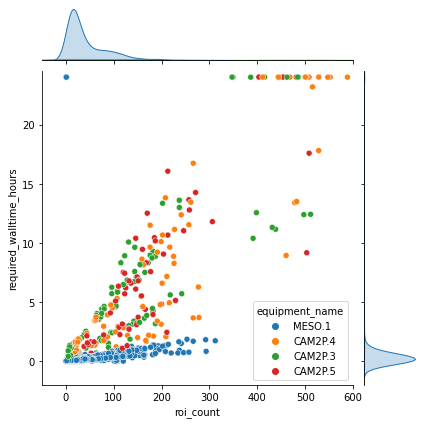

In [156]:
sns.jointplot(
    data = experiment_table_merged.fillna(0),
    x='roi_count',
    y='required_walltime_hours',
    hue='equipment_name',
    xlim = (-50,600),
    ylim=(-2,24.5),
#     hue_order = [str(n) for n in range(1,7)],
# #     palette=
#     size='dropout_count'
)

In [146]:
np.sqrt(experiment_table_merged.fillna(1)['dropout_count'].unique())

array([ 8.24621125,  9.89949494, 10.        ,  9.2736185 ,  7.48331477,
        9.59166305,  9.48683298,  8.94427191,  1.        ,  9.79795897,
        8.1240384 ,  9.38083152,  8.83176087,  7.34846923,  8.71779789])

In [135]:
experiment_table_merged['dropout_count'].fillna(0).unique()

array([ 68.,  98., 100.,  86.,  56.,  92.,  90.,  80.,   0.,  96.,  66.,
        88.,  78.,  54.,  76.])